# Workshop 02

In this workshop, we will understand matplotlib works under the hood. This knowledge will help you to create beautiful and meaningful figures for your research. 

Outline of the workshop:

1. Key concepts of matplotlib’s design
2. Understanding plt.subplots()
3. Visualizing arrays with matplotlib
4. Plotting with the pandas + matplotlib combination

### Matplotlib Object Hierarchy 

In [1]:
# Import releant libs
import matplotlib.pyplot as plt
import numpy as np

# Source: https://realpython.com

matplotlib.figure.Figure

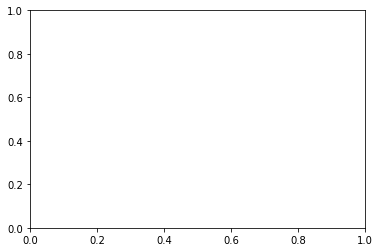

In [2]:
# Create toy plot
fig, _ = plt.subplots() # _ is the "wildcard" variable i.e., throw the content away.  
type(fig)

In [3]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

### Understanding plt.subplots() Notation

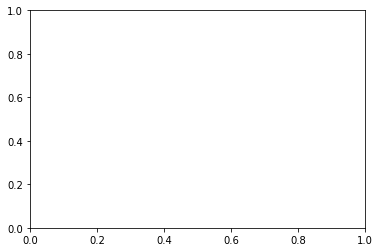

In [5]:
# NOTE: From here on, we work with the stateless (object-orientied approach) to plot figures
# Create fig and ax objects
fig, ax = plt.subplots() # Only time we use pyplot to create the initial objects 

In [6]:
# Subplots
type(ax)

matplotlib.axes._subplots.AxesSubplot

#### Working with pure matplotlib objects - First example

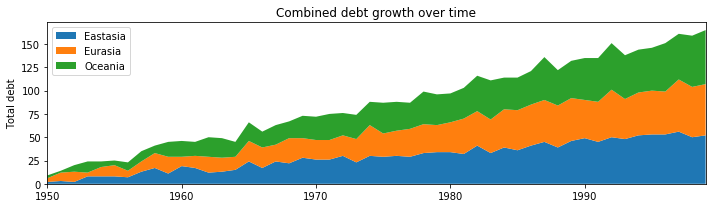

In [13]:
# Create three random time series objects of size (3, 50)
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

# Create fig and ax objects 
fig, ax = plt.subplots(figsize=(10, 3)) # figsize(float, float) - width, height in inches.

# Create a stacked plot object directly
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

# Set the title of the figure (ax)
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])

fig.tight_layout() # clean up whitespace padding

#### Working with pure matplotlib objects - Second example

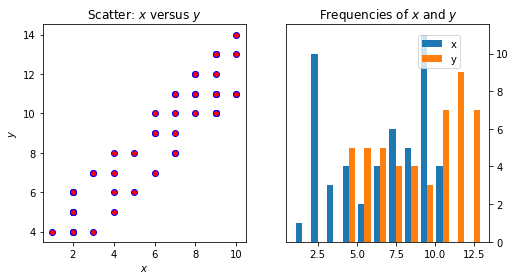

In [16]:
# Create random numbers
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y)) # create tuples based on x and y

# Create figure and TWO axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create first figure
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

## Create second figure
ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

# Good luck doing this with pure plt functions....

In [17]:
# Verify tree structure:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

#### Working with pure matplotlib objects - More than two axes 

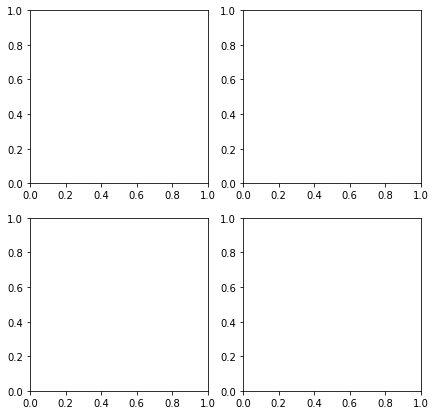

In [47]:
# What do we get by executing this?
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [18]:
# We get a 2 dimensional array of axes objects
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [52]:
# or
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b4f7e90>,
      dtype=object)

In [56]:
ax.shape

(2, 2)

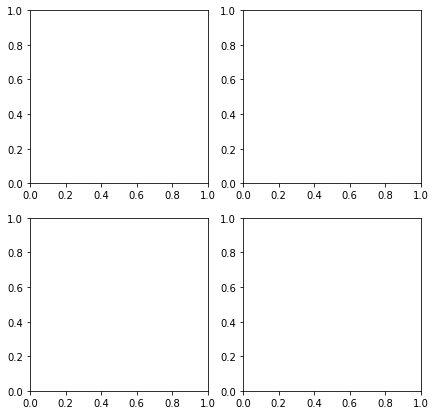

In [19]:
# But working with 2D arrays is annoying...
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

# Now we can work with each axes object (ax1, ..., ax4) 

#### How to create multiple axes (figures) of different size in one! plot 


<img src="resources/img1.png">

In [27]:
# Load some example data
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [28]:
# extract toy columns
y = housing[:, -1] 
pop, age = housing[:, [4, 7]].T

<img src="resources/img2.png">

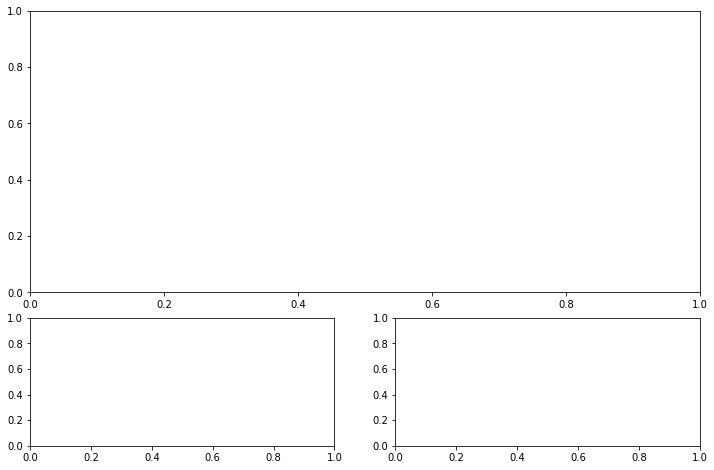

In [38]:
#Matplotlib’s gridspec module allows for more subplot customization. 
#pyplot’s subplot2grid() interacts with this module nicely. Let’s say we want to create a layout like this:

gridsize = (3, 2)  # Grid matrix with 3 rows and 2 columns 

fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # Start Location (0, 0)-spans over 2 rows and 2 columns
ax2 = plt.subplot2grid(gridsize, (2, 0)) # Start Location (2, 0) i.e., last row and first column
ax3 = plt.subplot2grid(gridsize, (2, 1)) # Start Location (2, 1) i.e., last row second column

In [36]:
# Define custom set title function 
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax


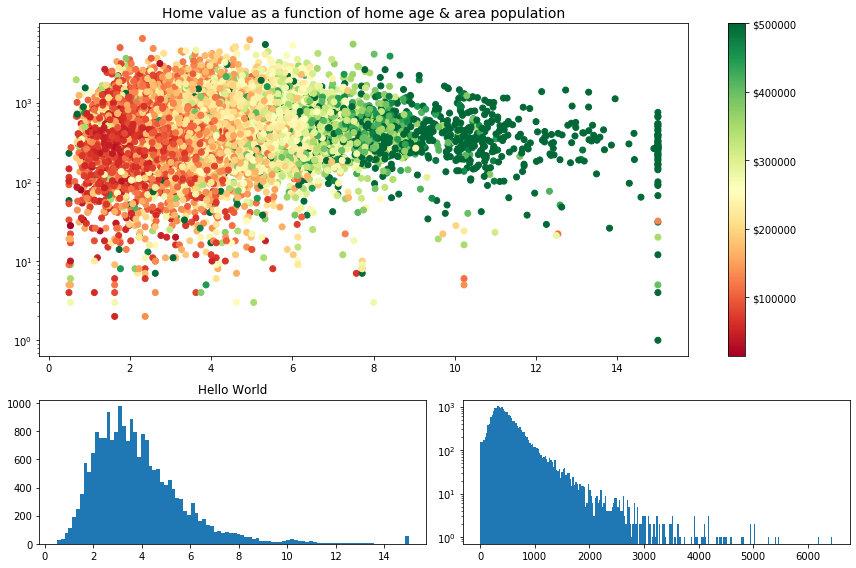

In [39]:
# Plot all three figures with respective axes objects
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn') # Add scatter plot to axes object

# Canvas 
fig.colorbar(sctr, ax=ax1, format='$%d') # Add colorbar to scatter plot (this needs to be done with the fig object)

ax1.set_yscale('log')

######


ax2.hist(age, bins='auto') # Add histogram to axes object

ax3.hist(pop, bins='auto', log=True) # Add histogram to axes object

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

fig

## The “Figures” Behind The Scenes

4842145424
4842337296
4842337296


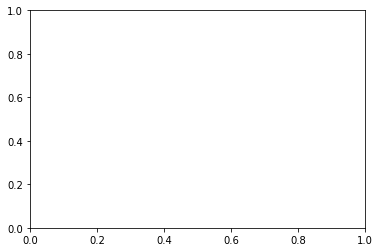

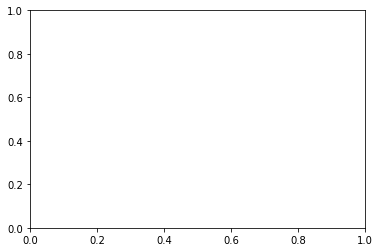

In [43]:
# How figures are managed internally
fig1, ax1 = plt.subplots()

# Address of figure object in memory
print(id(fig1))

# The stateless interface refers to the most recent figure object
print(id(plt.gcf())) #.gcf => .getCurrentFigure(), this is basically how plt.plot, plt.title etc know which figure to modify


4839575696


True

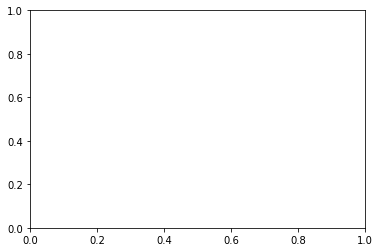

In [42]:
fig2, ax2 = plt.subplots()
print(id(fig2))
id(fig2) == id(plt.gcf())  # The current figure has changed to `fig2`.

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]

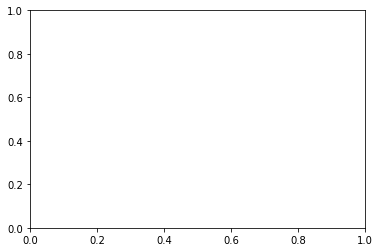

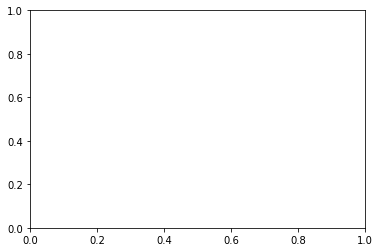

In [47]:
# How figures are managed internally
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# Internal Index for figures
plt.get_fignums()

# Iteratre through all figures in memory
[plt.figure(i) for i in plt.get_fignums()]

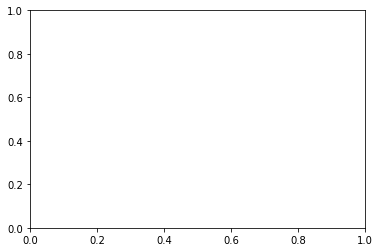

In [50]:
# plt stateful objects only reside in one cell 
plt.get_fignums()

# => Empty list

#However, the figure objects are still "alive"
fig1

## Axes Plotting 

So far, we just used ax.plot() or ax.stackplot() methods, but there are many more methods we can use to plot our data.

<img src='resources/img3.png'>

### Visualizing a matrix: matshow() 

In [54]:
# This is just a "toy" example - details are not that important. 
# Just want to shou you what you can do.

# Create two grids
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

In [55]:
# Deactivate labels
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)


{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


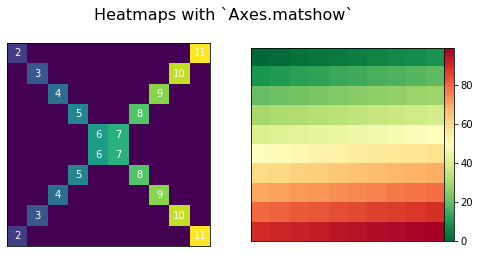

In [56]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
 
    ax1.matshow(x) # Display an array as a matrix in a new figure window.
    
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    
    # Hide labels 
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    
    # Add custom values in each cell 
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

## Plotting in Pandas


Bottom line: Pandas plotting == Wrapper for matplotlib 

"Unfortunately", pandas follows the "stateful" approach of matplotlib by calling pyplot (e.g., plot()) functions.

However, to create sophisticated figures we need to understand how we can mix pandas plotting methods with traditional matplotlib calls.

True

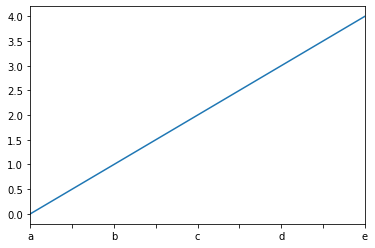

In [58]:
import pandas as pd

s = pd.Series(np.arange(5), index=list('abcde'))
ax = s.plot()

type(ax) # Returns AxesSubplot (as expected)

id(plt.gca()) == id(ax)

### Mixing pandas with matplotlib

<img src='resources/img4.png'>

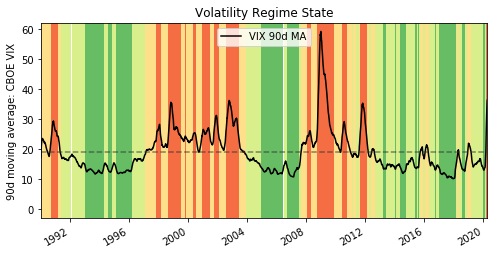

In [64]:
import pandas as pd
import matplotlib.transforms as mtransforms

# Download the data (some financial markets stuff)
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()

# Create CMAP object
cmap = plt.get_cmap('RdYlGn_r')

# Compute moving average avg_t = sum_i=t-90^t value_i
ma = vix.rolling('90d').mean()

# Assign each value to a category (0-3) 
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

# Plot Moving Average Line
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')

# Here, we mixing both approaches - we are now switching to the stateless approach
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])
#
# Add mean value
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')

# Making our figure fancy
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)